In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data set

In [2]:
data=pd.read_excel("advertising_sales_data.xlsx")
data.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [3]:
data.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


1.	What is the average amount spent on TV advertising in the dataset?

In [5]:
data["TV"].mean()

np.float64(147.0425)

2.	What is the correlation between radio advertising expenditure and product sales?

In [6]:
a=data.select_dtypes(include=np.number)
b=a.corr()
b.iloc[1,3]

np.float64(0.3497277129207838)

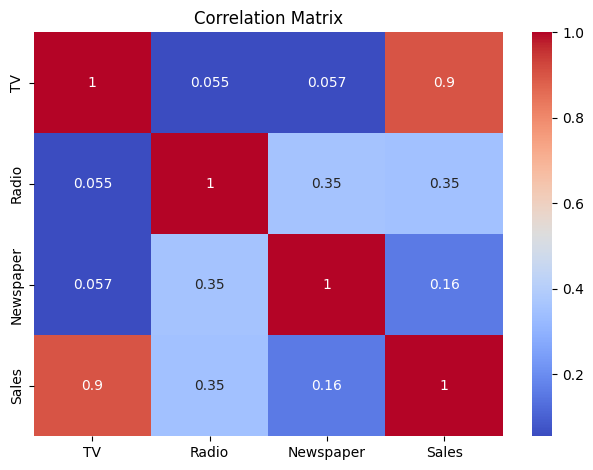

In [7]:
sns.heatmap(b, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

3.	Which advertising medium has the highest impact on sales based on the dataset?

In [8]:
b.loc["Sales"]

,Sales
TV,0.901208
Radio,0.349728
Newspaper,0.157960
Sales,1.000000


4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

In [9]:
data.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [10]:
data.iloc[152,:]

,152
Campaign,camp153
TV,197.6
Radio,NaN
Newspaper,14.2
Sales,16.6


In [11]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(data.iloc[:,1:-1])
data.iloc[:,1:-1]=imputer.transform(data.iloc[:,1:-1])

In [12]:
data.iloc[152,:]

,152
Campaign,camp153
TV,197.6
Radio,23.260606
Newspaper,14.2
Sales,16.6


In [13]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

Train test split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


linear regression

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=regressor.predict(x_test)

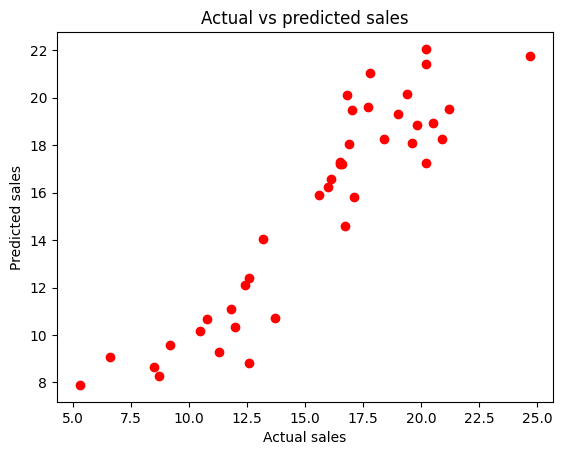

In [19]:
plt.scatter(y_test,y_pred,color="r")
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual vs predicted sales")

plt.show()

5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [20]:
regressor.predict([[200,40,50]])

array([19.80605821])

In [21]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

3.091432678838116

In [22]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8407280517760708

# Regression with normalization part 2 of the qus




In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data=pd.read_excel("advertising_sales_data.xlsx")
data.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(data.iloc[:,1:-1])
data.iloc[:,1:-1]=imputer.transform(data.iloc[:,1:-1])

In [ ]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[273.7         28.9         59.7       ]
 [163.5         36.8          7.4       ]
 [241.7         38.          23.2       ]
 [123.1         34.6         12.4       ]
 [255.4         26.9          5.5       ]
 [193.7         35.4         75.6       ]
 [177.          33.4         38.7       ]
 [  0.7         39.6          8.7       ]
 [ 73.4         17.          12.9       ]
 [  8.7         48.9         75.        ]
 [131.7         18.4         34.6       ]
 [222.4          4.3         49.8       ]
 [214.7         24.           4.        ]
 [191.1         28.7         18.2       ]
 [ 62.3         12.6         18.3       ]
 [109.8         47.8         51.4       ]
 [ 31.5         24.6          2.2       ]
 [  8.6          2.1          1.        ]
 [ 19.6         20.1         17.        ]
 [276.9         48.9         41.8       ]
 [248.8         27.1         22.9       ]
 [219.8         33.5         45.1       ]
 [107.4         14.          10.9       ]
 [293.6         27.7          1.8 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[0.92323301 0.58266129 0.52242744]
 [0.550558   0.74193548 0.06244503]
 [0.81501522 0.76612903 0.20140721]
 [0.41393304 0.69758065 0.1064204 ]
 [0.86134596 0.54233871 0.04573439]
 [0.65268854 0.71370968 0.66226913]
 [0.59621238 0.6733871  0.33773087]
 [0.         0.7983871  0.07387863]
 [0.24585729 0.34274194 0.11081794]
 [0.02705445 0.9858871  0.65699208]
 [0.44301657 0.37096774 0.30167106]
 [0.74974636 0.08669355 0.4353562 ]
 [0.72370646 0.48387097 0.03254178]
 [0.64389584 0.57862903 0.15743184]
 [0.20831924 0.25403226 0.15831135]
 [0.36895502 0.96370968 0.44942832]
 [0.10415962 0.49596774 0.01671064]
 [0.02671627 0.04233871 0.00615655]
 [0.06391613 0.40524194 0.14687775]
 [0.93405479 0.9858871  0.3649956 ]
 [0.83902604 0.54637097 0.19876869]
 [0.74095367 0.67540323 0.39401935]
 [0.36083869 0.28225806 0.09322779]
 [0.99053094 0.55846774 0.01319261]
 [0.95908015 0.21370968 0.05364996]
 [0.25228272 0.40927419 0.28320141]
 [0.85593507 0.42943548 0.26121372]
 [0.08217788 0.22177419 0.25

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test)

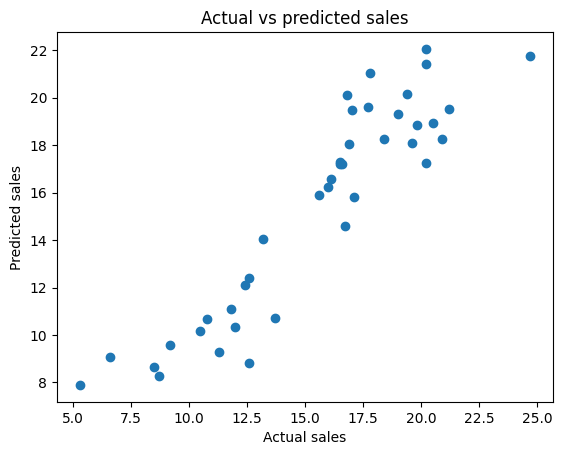

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual vs predicted sales")

plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8407280517760711

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

3.0914326788381086

# Regression using only Radio and newspaper

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel("advertising_sales_data.xlsx")
data.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(data.iloc[:,1:-1])
data.iloc[:,1:-1]=imputer.transform(data.iloc[:,1:-1])

In [ ]:
x=data.iloc[:,2:-1].values
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

26.07332441285081

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

-0.3433089467987551

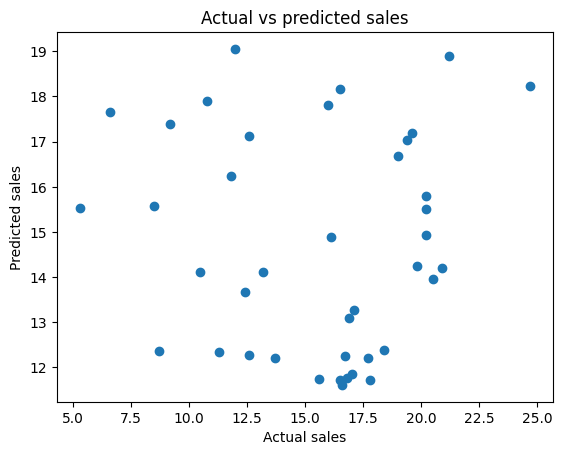

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual vs predicted sales")

plt.show()